# Pairs Trading

In [1]:
from typing import List, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import yfinance as yf

sns.set_theme()

In [2]:
def get_stocks_data(tickers: List[str],
                    freq: str = "1d",
                    start_date: Union[str, None] = None,
                    end_date: Union[str, None] = None) -> pd.DataFrame:
    df = pd.DataFrame()
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        stock_data = stock.history(period=freq, start=start_date, end=end_date).Close
        df = pd.concat([df, stock_data], axis=1)
    
    df.columns = tickers
    return df

In [3]:
tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA",
           "WMT", "GS", "XOM", "NKE", "META", "BRK-B", "MSFT"]
data = get_stocks_data(tickers, start_date="2020-01-01", end_date="2023-06-01")

In [4]:
data.head()

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,GS,XOM,NKE,META,BRK-B,MSFT
2020-01-02 00:00:00-05:00,282.840210,73.347939,68.368500,49.099998,1.5775,307.375702,329.809998,331.348572,112.483604,215.880463,58.530796,98.803711,209.779999,228.389999,155.422058
2020-01-03 00:00:00-05:00,284.064514,72.634842,68.032997,48.599998,1.4700,305.048126,325.899994,330.791901,111.490601,213.356079,58.060242,98.533028,208.669998,226.179993,153.486755
2020-01-06 00:00:00-05:00,283.370483,73.213623,69.710503,48.389999,1.4625,306.211914,335.829987,331.766083,111.263618,215.539597,58.506031,98.446022,212.600006,226.990005,153.883530
2020-01-07 00:00:00-05:00,281.346069,72.869293,69.667000,48.250000,1.3800,305.350861,330.750000,335.285156,110.232796,216.958405,58.027218,98.397682,213.059998,225.919998,152.480438
2020-01-08 00:00:00-05:00,280.102478,74.041489,70.216003,47.830002,1.4300,306.978271,339.260010,329.410095,109.854500,219.049759,57.152157,98.175331,215.220001,225.990005,154.909195


In [5]:
data.corr()

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,GS,XOM,NKE,META,BRK-B,MSFT
DPZ,1.000000,0.383574,0.700732,0.701988,0.566189,0.570340,0.623244,0.057971,0.309777,0.473827,-0.259402,0.771480,0.717493,0.192612,0.583312
AAPL,0.383574,1.000000,0.808784,0.767620,0.619057,0.911643,-0.092968,-0.097769,0.755696,0.809647,0.635400,0.582723,0.110551,0.876402,0.919964
GOOG,0.700732,0.808784,1.000000,0.844866,0.834958,0.939367,0.238779,0.136513,0.558621,0.849604,0.298869,0.788432,0.489336,0.746834,0.929839
AMD,0.701988,0.767620,0.844866,1.000000,0.571454,0.822044,0.384550,0.058018,0.571851,0.637571,0.138457,0.816879,0.529118,0.573258,0.872265
GME,0.566189,0.619057,0.834958,0.571454,1.000000,0.790670,0.180862,0.153249,0.411881,0.818070,0.286183,0.629468,0.394545,0.632247,0.727744
SPY,0.570340,0.911643,0.939367,0.822044,0.790670,1.000000,0.139970,0.178275,0.712990,0.932063,0.498558,0.780049,0.354722,0.871742,0.948837
NFLX,0.623244,-0.092968,0.238779,0.384550,0.180862,0.139970,1.000000,0.385268,0.134414,0.062884,-0.649918,0.622811,0.845022,-0.285887,0.134383
BA,0.057971,-0.097769,0.136513,0.058018,0.153249,0.178275,0.385268,1.000000,-0.041671,0.212319,-0.137705,0.361153,0.422148,0.060314,0.011370
WMT,0.309777,0.755696,0.558621,0.571851,0.411881,0.712990,0.134414,-0.041671,1.000000,0.633542,0.428779,0.584490,0.195017,0.676177,0.684364
GS,0.473827,0.809647,0.849604,0.637571,0.818070,0.932063,0.062884,0.212319,0.633542,1.000000,0.600722,0.671548,0.219258,0.853923,0.845088


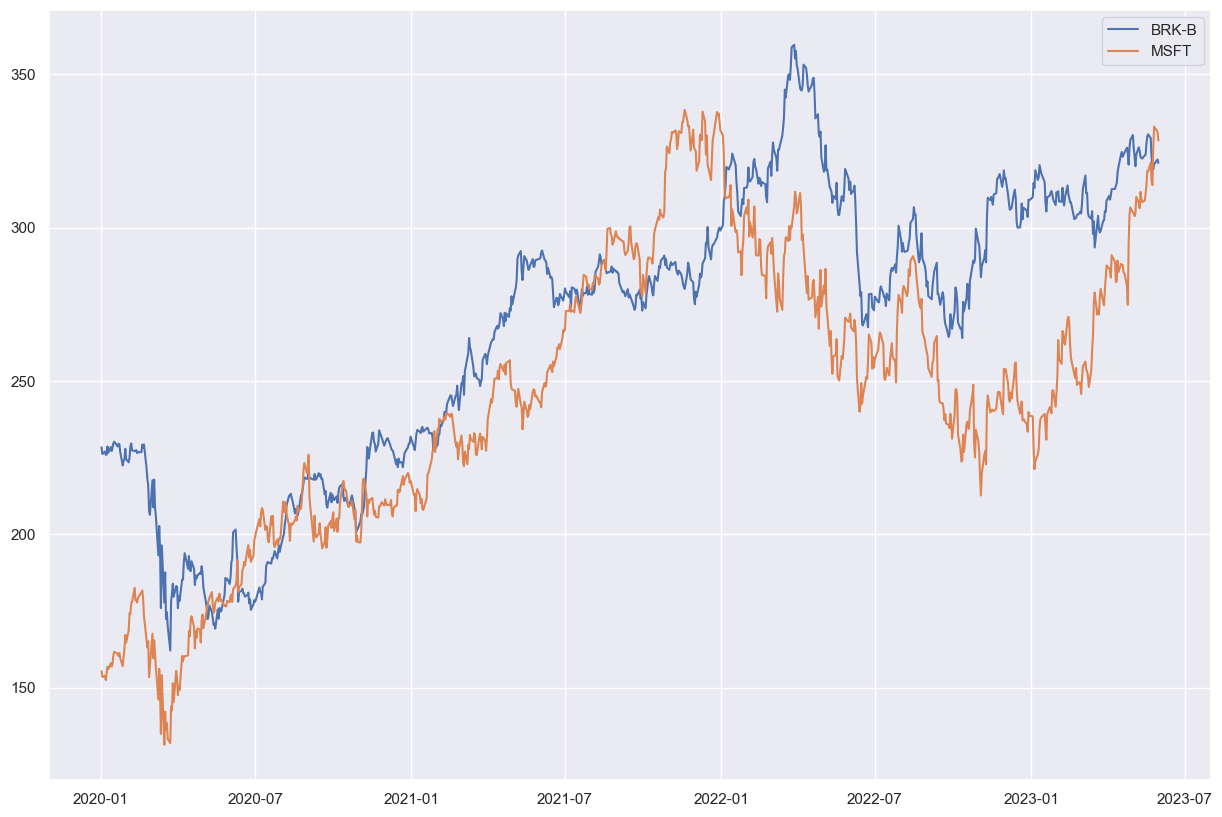

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(data["BRK-B"], label="BRK-B")
plt.plot(data["MSFT"], label="MSFT")
plt.legend()
plt.show()

### Getting the spread

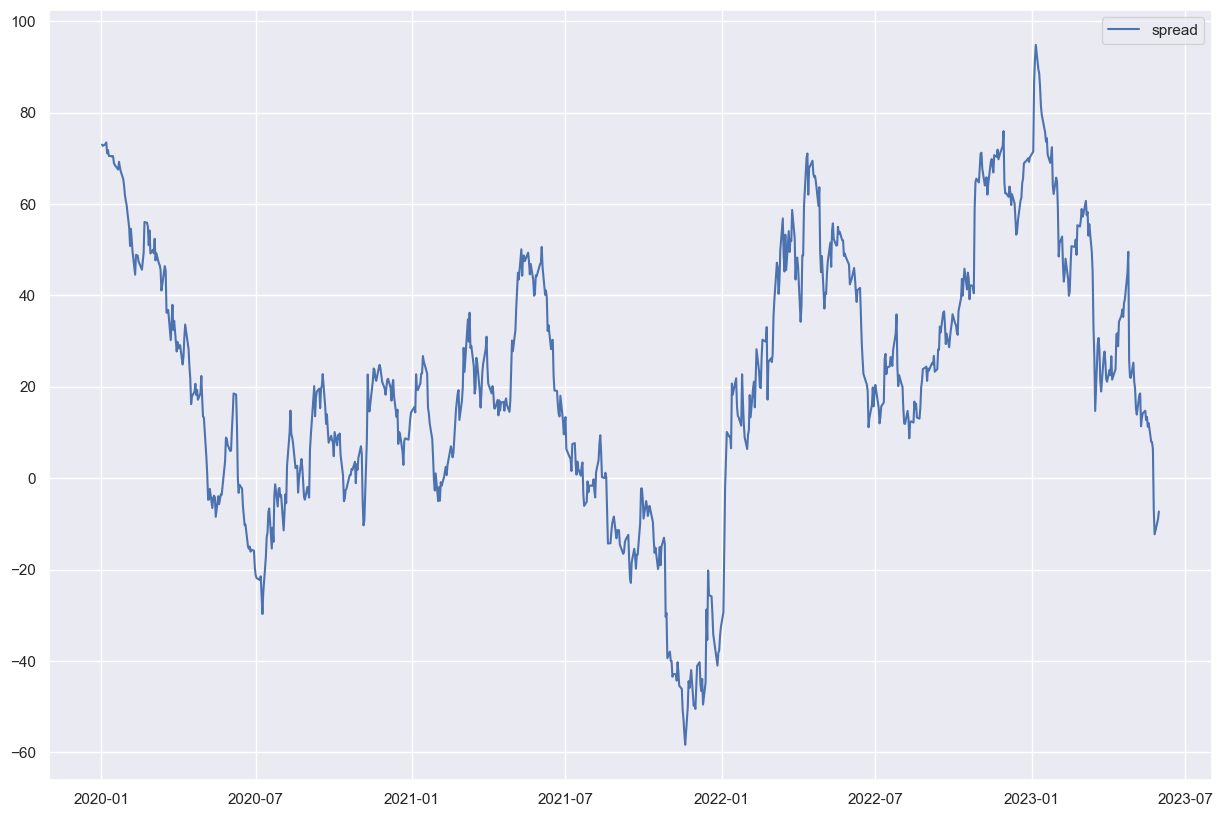

In [7]:
spread = data["BRK-B"] - data["MSFT"]
plt.figure(figsize=(15, 10))
plt.plot(spread, label="spread")
plt.legend()
plt.show()

### Normalization

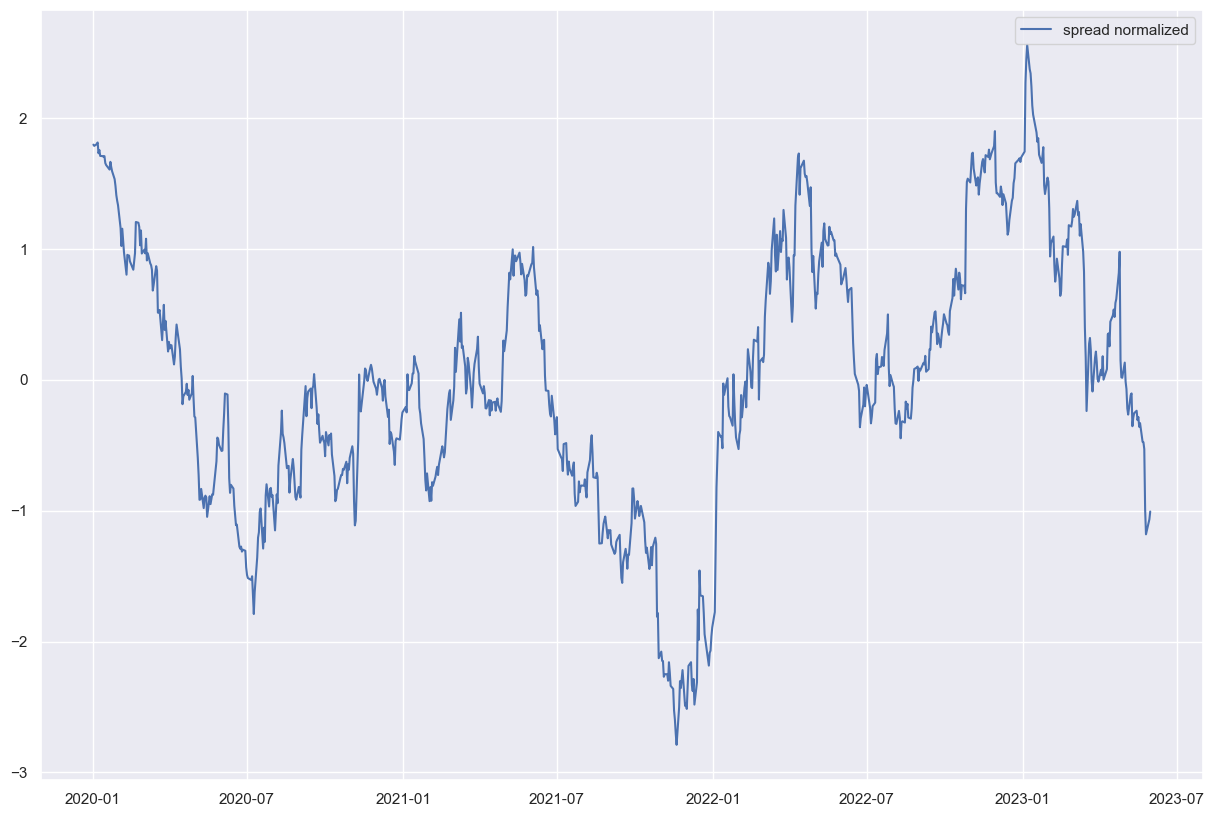

In [8]:
spread_mean = spread.mean()
spread_std = spread.std()

spread_norm = (spread - spread_mean) / spread_std

plt.figure(figsize=(15, 10))
plt.plot(spread_norm, label="spread normalized")
plt.legend()
plt.show()

### Trade signal

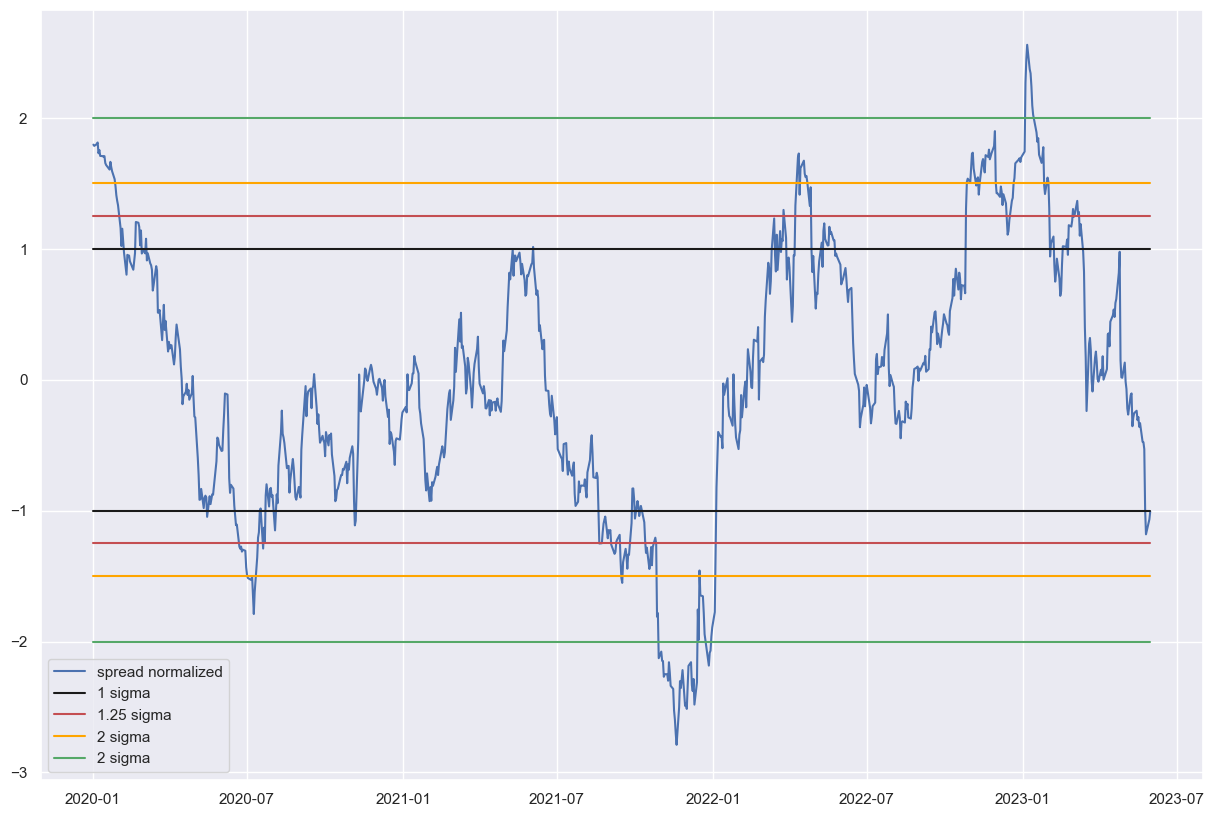

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(spread_norm, label="spread normalized")
plt.plot(spread_norm.index, [-1] * len(spread), 'k', label="1 sigma")
plt.plot(spread_norm.index, [1] * len(spread), 'k')
plt.plot(spread_norm.index, [-1.25] * len(spread), 'r', label="1.25 sigma")
plt.plot(spread_norm.index, [1.25] * len(spread), 'r')
plt.plot(spread_norm.index, [-1.5] * len(spread), 'orange', label="2 sigma")
plt.plot(spread_norm.index, [1.5] * len(spread), 'orange')
plt.plot(spread_norm.index, [-2] * len(spread), 'g', label="2 sigma")
plt.plot(spread_norm.index, [2] * len(spread), 'g')
plt.legend()
plt.show()

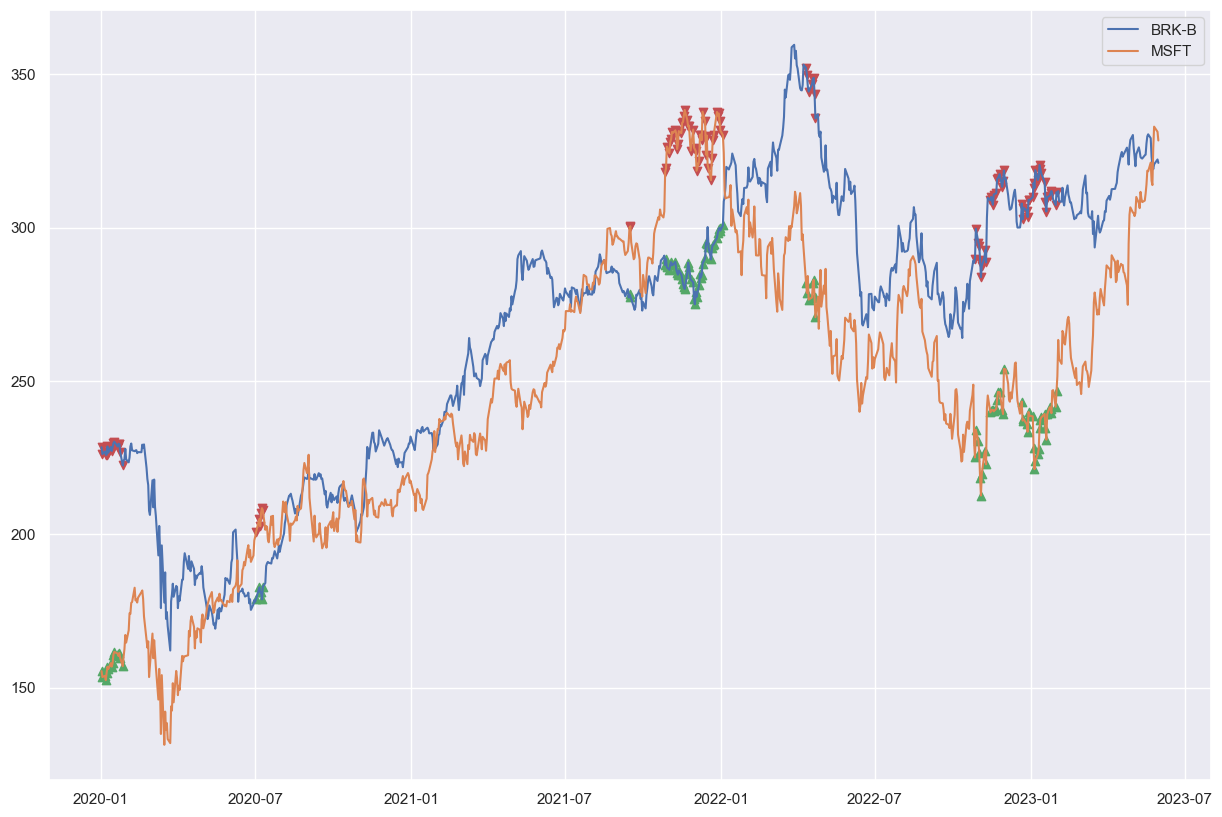

In [45]:
plt.figure(figsize=(15, 10))
plt.plot(data["BRK-B"], label="BRK-B")
plt.plot(data["MSFT"], label="MSFT")
plt.legend()

stdevs = 1.5

for sr, kv in zip(spread_norm, data.iterrows()):
    time, row = kv
    if sr < -stdevs:
        plt.scatter(time, row.MSFT, marker="v", c="r")
        plt.scatter(time, row["BRK-B"], marker="^", c="g")
    if sr > stdevs:
        plt.scatter(time, row.MSFT, marker="^", c="g")
        plt.scatter(time, row["BRK-B"], marker="v", c="r")

plt.show()